In [4]:
%load_ext autoreload
%autoreload 2
import meerkat as mk
import pandas as pd
from meerkat.contrib.imagenet import build_imagenet_dps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open("/home/common/datasets/imagenet/LOC_synset_mapping.txt") as f:
    lines = f.read().splitlines() 
    df = mk.PandasSeriesColumn(lines).str.split(" ", expand=True, n=1)

In [3]:
df

,0 (PandasSeriesColumn),1 (PandasSeriesColumn),index (PandasSeriesColumn)
0,n01440764,"tench, Tinca tinca",0
1,n01443537,"goldfish, Carassius auratus",1
2,n01484850,"great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",2
3,n01491361,"tiger shark, Galeocerdo cuvieri",3
4,n01494475,"hammerhead, hammerhead shark",4
...,...,...,...
995,n13044778,earthstar,995
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa",996
997,n13054560,bolete,997
998,n13133613,"ear, spike, capitulum",998


In [8]:
out = mk.DataPanel.from_csv("/pd/common/datasets/imagenet/LOC_train_solution.csv")

In [14]:
dp = build_imagenet_dps(dataset_dir="/pd/common/datasets/test/", download=True)

imagenet-object-localization-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


FileNotFoundError: [Errno 2] No such file or directory: 'unzip imagenet-object-localization-challenge.zip'

,synset (PandasSeriesColumn),image_id (PandasSeriesColumn),path (PandasSeriesColumn),split (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),name (PandasSeriesColumn)
0,n01440764,n01440764_10026,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10026.JPEG,train,0,,"tench, Tinca tinca"
1,n01440764,n01440764_10027,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10027.JPEG,train,0,,"tench, Tinca tinca"
2,n01440764,n01440764_10029,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10029.JPEG,train,0,,"tench, Tinca tinca"
3,n01440764,n01440764_10040,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10040.JPEG,train,0,,"tench, Tinca tinca"
4,n01440764,n01440764_10042,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_10042.JPEG,train,0,,"tench, Tinca tinca"
...,...,...,...,...,...,...,...
1331162,n03388043,ILSVRC2012_val_00005961,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00005961.JPEG,valid,562,,fountain
1331163,n03089624,ILSVRC2012_val_00008801,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00008801.JPEG,valid,509,,"confectionery, confectionary, candy store"
1331164,n01518878,ILSVRC2012_val_00008176,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00008176.JPEG,valid,9,,"ostrich, Struthio camelus"
1331165,n03874293,ILSVRC2012_val_00004764,/pd/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00004764.JPEG,valid,694,,"paddlewheel, paddle wheel"

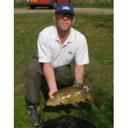
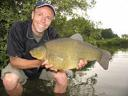
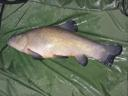
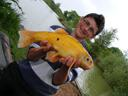
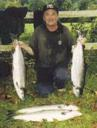
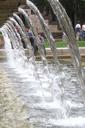
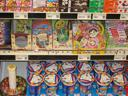
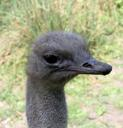
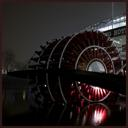
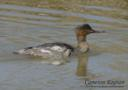

In [23]:
dp

In [10]:
import PIL
import subprocess
from xml.dom import minidom
from os.path import basename

In [22]:
xml_folder=r'/home/common/datasets/imagenet/ILSVRC/Annotations/CLS-LOC/train/'
train_folder=r'/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train'
test_folder=r'/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/test/'

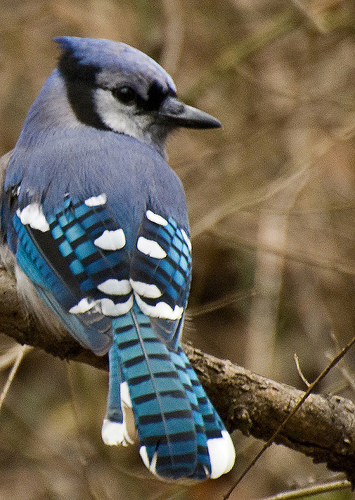

In [15]:
PIL.Image.open('/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01580077/n01580077_28541.JPEG')


In [44]:
df = pd.read_csv("/home/common/datasets/imagenet/ILSVRC/ImageSets/CLS-LOC/train_cls.txt", delimiter=" ", names=["path", "idx"])

In [49]:
df["path"].str.extract(r"(?P<synset>.*)/(?P<image_id>.*)")

,synset,image_id
0,n01440764,n01440764_10026
1,n01440764,n01440764_10027
2,n01440764,n01440764_10029
3,n01440764,n01440764_10040
4,n01440764,n01440764_10042
...,...,...
1281162,n15075141,n15075141_9915
1281163,n15075141,n15075141_9933
1281164,n15075141,n15075141_9942
1281165,n15075141,n15075141_9993


In [11]:
df = pd.read_csv("/home/common/datasets/imagenet/ILSVRC/ImageSets/CLS-LOC/val.txt", delimiter=" ", names=["path", "idx"])

In [12]:
df

,path,idx
0,ILSVRC2012_val_00000001,1
1,ILSVRC2012_val_00000002,2
2,ILSVRC2012_val_00000003,3
3,ILSVRC2012_val_00000004,4
4,ILSVRC2012_val_00000005,5
...,...,...
49995,ILSVRC2012_val_00049996,49996
49996,ILSVRC2012_val_00049997,49997
49997,ILSVRC2012_val_00049998,49998
49998,ILSVRC2012_val_00049999,49999


In [13]:
df = pd.read_csv("/home/common/datasets/imagenet/LOC_val_solution.csv")

In [19]:
df["synset"] = df["PredictionString"].str.split(" ", expand=True)[0]

,ImageId,PredictionString,synset
0,ILSVRC2012_val_00048981,n03995372 85 1 499 272,n03995372
1,ILSVRC2012_val_00037956,n03481172 131 0 499 254,n03481172
2,ILSVRC2012_val_00026161,n02108000 38 0 464 280,n02108000
3,ILSVRC2012_val_00026171,n03109150 0 14 216 299,n03109150
4,ILSVRC2012_val_00008726,n02119789 255 142 454 329 n02119789 44 21 322 ...,n02119789
...,...,...,...
49995,ILSVRC2012_val_00005961,n03388043 103 0 279 472,n03388043
49996,ILSVRC2012_val_00008801,n03089624 101 286 170 374 n03089624 236 282 30...,n03089624
49997,ILSVRC2012_val_00008176,n01518878 82 98 439 498,n01518878
49998,ILSVRC2012_val_00004764,n03874293 91 111 490 420,n03874293


In [68]:
df = pd.read_csv("/home/common/datasets/imagenet/LOC_synset_mapping.txt", names=[0, 1], delimiter=" ")

In [6]:
with open("/home/common/datasets/imagenet/LOC_synset_mapping.txt") as f:
    lines = f.read().splitlines() 
    df = pd.Series(lines).str.split(" ", expand=True, n=1).rename(columns={0: "synset",  1: "name"})

In [7]:
df

,synset,name
0,n01440764,"tench, Tinca tinca"
1,n01443537,"goldfish, Carassius auratus"
2,n01484850,"great white shark, white shark, man-eater, man..."
3,n01491361,"tiger shark, Galeocerdo cuvieri"
4,n01494475,"hammerhead, hammerhead shark"
...,...,...
995,n13044778,earthstar
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ..."
997,n13054560,bolete
998,n13133613,"ear, spike, capitulum"


In [15]:
import nltk

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
from wordnet import Dictionary

ModuleNotFoundError: No module named 'wordnet'

In [29]:
from nltk.corpus import wordnet as wn


In [22]:
wordnet.synset("n.03995372")

ValueError: not enough values to unpack (expected 3, got 2)

In [45]:
vehicle = wn.synset('toilet_paper.n.01')

In [60]:
wn.synset_from_pos_and_offset(offset=1440764, pos="n").hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0]

Synset('fish.n.01')

In [31]:
typesOfVehicles = list(set([w for s in vehicle.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))


/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('personnel_carrier.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('reconnaissance_vehicle.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('weapons_carrier.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('warplane.n.01') at depth 4
  for synset in acyclic_breadth_first(self, rel, depth):
/home/common/envs/conda/envs/d

In [63]:
list(wn.synset("snowmobile.n.01").closure(lambda s: s.hypernyms()))

/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/nltk/corpus/reader/wordnet.py:580: UserWarning: Discarded redundant search for Synset('instrumentality.n.03') at depth 6
  for synset in acyclic_breadth_first(self, rel, depth):


[Synset('tracked_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('container.n.01'),
 Synset('vehicle.n.01'),
 Synset('instrumentality.n.03'),
 Synset('conveyance.n.03'),
 Synset('artifact.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]